# KI Team 11
Inhalt:
- Model 0
- Model 1
- Model 2
- Testdaten Validierung

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns

# for neural networks
import tensorflow as tf
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')
X = data.values[:, 1:-1]
y = data['Cover_Type'].values
x_train, x_val, y_train, y_val = train_test_split(X, y)
# scale the data
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)
# save fitted scaler, because you need it later for the test dataset
pickle.dump(scaler, open("scaler.p", "wb"))
best_accuracy_so_far_model0 = -100
best_accuracy_so_far_model1 = -100
best_accuracy_so_far_model2 = -100
# Now apply the transformations to the data:
X_train = scaler.transform(x_train)
X_val = scaler.transform(x_val)

2022-12-03 12:24:53.551927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Model 0 Relu
## Eigenschaften:
* Input Layer: 54 Neuronen
* Anzahl Hidden Layers: 2
* Dropout: 0.1
* Anzahl Neuronen pro Hidden Layer: 16, 8
* Output Layer: 8 Neuronen
* Aktivierungsfunktionen: Relu, Sigmoid
* Optimizer: Adam
* Loss: Sparse Categorical Crossentropy
* Metrics: Accuracy
* Epochs: 50
* Batch Size: 20

## Ergebnis:
# ≈ 74% Accuracy gegen die Validierungsteil der Trainingsdaten
# ≈ 36% Accuracy gegen die Testdaten

In [2]:
BATCHSIZE = 20
EPOCHS = 50
clear_session()

# create neural network
model = Sequential()

model.add(Input(shape=54))
model.add(Dense(units = 16, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 8, activation ="relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 8, kernel_initializer="uniform", activation='sigmoid'))

learning_rate = 0.001
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"],
)

# train neural network
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    shuffle=True,
    batch_size=BATCHSIZE,
    epochs=EPOCHS,
    verbose = True
)

# Evaluate the model accuracy on the validation set.
score = model.evaluate(X_val, y_val, verbose=0)

# save best model so far to be able to use the best model later to predict with test data
if score[1] >= best_accuracy_so_far_model0:
    tf.keras.models.save_model(model, 'Relu_Softmax.mdl')
    best_accuracy_so_far_model0 = score[1]

Epoch 1/50


2022-12-03 12:24:54.943653: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


567/567 [==============================] - 1s 1ms/step - loss: 1.5887 - accuracy: 0.3696 - val_loss: 1.0850 - val_accuracy: 0.5534
Epoch 2/50
567/567 [==============================] - 1s 898us/step - loss: 1.0715 - accuracy: 0.5567 - val_loss: 0.9136 - val_accuracy: 0.6172
Epoch 3/50
567/567 [==============================] - 1s 920us/step - loss: 0.9692 - accuracy: 0.5880 - val_loss: 0.8631 - val_accuracy: 0.6280
Epoch 4/50
567/567 [==============================] - 0s 868us/step - loss: 0.9268 - accuracy: 0.6061 - val_loss: 0.8319 - val_accuracy: 0.6487
Epoch 5/50
567/567 [==============================] - 1s 890us/step - loss: 0.8972 - accuracy: 0.6164 - val_loss: 0.8032 - val_accuracy: 0.6484
Epoch 6/50
567/567 [==============================] - 1s 882us/step - loss: 0.8751 - accuracy: 0.6231 - val_loss: 0.7896 - val_accuracy: 0.6608
Epoch 7/50
567/567 [==============================] - 1s 891us/step - loss: 0.8599 - accuracy: 0.6347 - val_loss: 0.7748 - val_accuracy: 0.6772
Epoch

# Sigmoid Tanh Vergleich (Aktivierungsfunktionen)

<img src="https://img001.prntscr.com/file/img001/BR0WRfJbSlCRpLLhWE7XYw.png">

# Model 1 Sigmoid_Softmax
## Eigenschaften:
* Input Layer: 54 Neuronen
* Anzahl Hidden Layers: 4
* Anzahl Neuronen pro Hidden Layer: 300, 200, 100, 50
* Output Layer: 8 Neuronen
* Aktivierungsfunktionen: Sigmoid, Softmax
* Optimizer: Adam
* Loss: Sparse Categorical Crossentropy
* Metrics: Accuracy
* Batch Size: 20
* Epochs: 70

## Ergebnis:
# ≈ 85% Accuracy gegen die Validierungsteil der Trainingsdaten
# ≈ 47% Accuracy gegen die Testdaten


In [ ]:
BATCHSIZE = 20
EPOCHS = 70
clear_session()

# create neural network
model = Sequential()
model.add(Input(shape=54))
model.add(Dense(units = 300, activation="sigmoid"))
model.add(Dense(units = 200, activation ="sigmoid"))
model.add(Dense(units = 100, activation ="sigmoid"))
model.add(Dense(units = 50, activation ="sigmoid"))
model.add(Dense(units = 8, kernel_initializer="uniform", activation='softmax'))

learning_rate = 0.001
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=learning_rate),
    metrics=["accuracy"],
)

# train neural network
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    shuffle=True,
    batch_size=BATCHSIZE,
    epochs=EPOCHS,
    verbose = True
)

# Evaluate the model accuracy on the validation set.
score = model.evaluate(X_val, y_val, verbose=0)

# save best model so far to be able to use the best model later to predict with test data
if score[1] >= best_accuracy_so_far_model1:
    tf.keras.models.save_model(model, 'Sigmoid_Softmax.mdl')
    best_accuracy_so_far_model1 = score[1]


<h1>Erkenntnisse zu Sigmoid/Softmax mit adaptiver Lernrate</h1>
<img src="https://img001.prntscr.com/file/img001/yslNRF4ZQ9edKPvKFSQ_vA.png" width="1600">
<h2>Eine zu hohe Lernrate hat zufolge, dass das Lokale Minimum verfehlt wird. Daher sollte man die Lernrate entsprechend nicht zu hoch wählen.</h2>

# Model 2 Tanh_Softmax
## Eigenschaften:
* Input Layer: 54 Neuronen
* Anzahl Hidden Layers: 4
* Anzahl Neuronen pro Hidden Layer: 300, 200, 100, 50
* Output Layer: 8 Neuronen
* Aktivierungsfunktionen: Tanh, Softmax
* Optimizer: rmsprop
* Loss: Sparse Categorical Crossentropy
* Metrics: Accuracy
* Batch Size: 20
* Epochs: 50

## Ergebnisse:
### ≈ 85% Accuracy gegen den Validierungsteil der Trainingsdaten
### ≈ 52% Accuracy gegen die Testdaten


In [ ]:
BATCHSIZE = 20
EPOCHS = 50
clear_session()

# create neural network
model = Sequential()
model.add(Input(shape=54))
model.add(Dense(units = 300, activation="tanh"))
model.add(Dense(units = 200, activation ="tanh"))
model.add(Dense(units = 100, activation ="tanh"))
model.add(Dense(units = 50, activation ="tanh"))
model.add(Dense(units = 8, kernel_initializer="uniform", activation='softmax'))

learning_rate = 0.001
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"],
)

# train neural network
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    shuffle=True,
    batch_size=BATCHSIZE,
    epochs=EPOCHS,
    verbose = True
)

# Evaluate the model accuracy on the validation set.
score = model.evaluate(X_val, y_val, verbose=0)

# save best model so far to be able to use the best model later to predict with test data
if score[1] >= best_accuracy_so_far_model2:
    tf.keras.models.save_model(model, 'TanH_Softmax.mdl')
    best_accuracy_so_far_model2 = score[1]

# Erkenntnisse:
### - Model 0 hat eine schlechte Accuracy, weil durch die Aktivierungsfunktion Relu negative Werte auf 0 gesetzt werden. Relu würde negative Werte auf 0 mappen, das führt zu toten Neuronen, hat aber einen Geschwindigkeitsvorteil.
### - Model 2 ist schneller als Model 1, denn die Accuracy von 85% wird schon bei 50 Epochen erreicht.

# Validierung des Models

In [5]:
## Load model with best accuracy
model = tf.keras.models.load_model('TanH_Softmax.mdl')
## Load Test DataSet
test_data = pd.read_csv('test.csv')
X_test = test_data.values[:, 1:-1]
y_test = test_data['Cover_Type'].values

scaler = StandardScaler()
## Fit only to the training data
scaler.fit(X_test)
## important: preprocessing of test dataset has to be the same as for the training dataset
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
## create labels out of predictions
y_pred_labels = np.argmax(y_pred, axis=1)

17685/17685 [==============================] - 16s 918us/step


Our accuracy against the provided testdata is 47.22809299300927%
              precision    recall  f1-score   support

           1       0.78      0.51      0.62    209680
           2       0.69      0.44      0.54    281141
           3       0.20      0.37      0.26     33594
           4       0.03      0.89      0.05       587
           5       0.01      0.05      0.01      7333
           6       0.09      0.50      0.15     15207
           7       0.53      0.83      0.64     18350

    accuracy                           0.47    565892
   macro avg       0.33      0.51      0.32    565892
weighted avg       0.66      0.47      0.54    565892



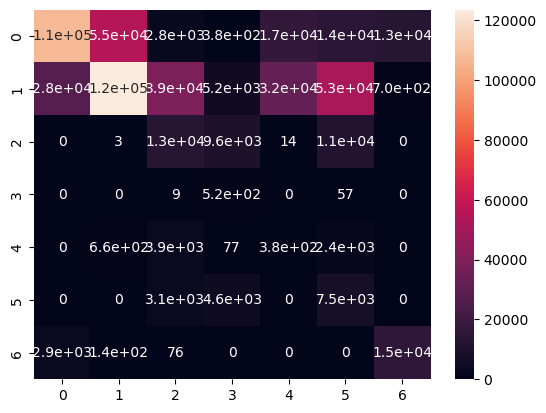

In [8]:
sns.heatmap(cm, annot=True)
plt.savefig('confmat.png')
cm = confusion_matrix(y_test, y_pred_labels)
print("Our accuracy against the provided testdata is {}%".format(((cm[0][0] + cm[1][1] + cm[2][2]+ cm[3][3]+ cm[4][4]+ cm[5][5]+ cm[6][6]) / cm.sum()) * 100))
print(classification_report(y_test, y_pred_labels))